In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000115 (2).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000115 (5).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000112.png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000118 (5).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000117 (4).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000114 (6).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000117 (6).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000114 (4).png
/kaggle/input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000118 (4).png
/kaggle/input/chest-cts

In [2]:
#Importar Librerias necesarias
import cv2
import matplotlib.pyplot as plt
import glob
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [5]:
# Preview de una imagen de prueba
file = '../input/chest-ctscan-images/Data/test/adenocarcinoma/000115 (8).png'
test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )
#plt.imshow(test_image, cmap='gray')

In [14]:
#TEST DATASET
test_images  = []
test_labels  = []

In [15]:
#TEST DATASET
#CATEGORY: ADENOCARCINOMA - 0
file = '../input/chest-ctscan-images/Data/test/adenocarcinoma' 

for x in glob.iglob(f'{file}/*.png'):
  #plt.imshow(x, cmap='gray')
  #print(x)
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(0)

In [16]:
#CATEGORY: LARGE CELL CARCINOMA - 1
file = '../input/chest-ctscan-images/Data/test/large.cell.carcinoma' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(1)

In [17]:
#CATEGORY: NORMAL - 2
file = '../input/chest-ctscan-images/Data/test/normal' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(2)

In [18]:
#CATEGORY: SQUAMOUS - 3
file = '../input/chest-ctscan-images/Data/test/squamous.cell.carcinoma' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  test_images.append(img_resized)
  test_labels.append(3)

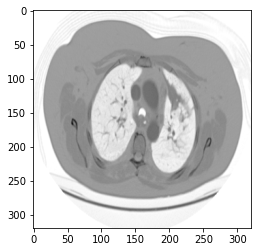

In [19]:
# Preview de una imagen de prueba
plt.imshow(test_images[314], cmap='gray')

In [20]:
# Preview de una label de prueba
test_labels[120]

1

In [21]:
#TRAIN DATASET
train_images = []
train_labels = []

In [22]:
#TRAIN DATASET
#CATEGORY: ADENOCARCINOMA - 0
file = '../input/chest-ctscan-images/Data/train/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib' 

for x in glob.iglob(f'{file}/*.png'):
  #plt.imshow(x, cmap='gray')
  #print(x)
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(0)

In [23]:
#CATEGORY: LARGE CELL CARCINOMA - 1
file = '../input/chest-ctscan-images/Data/train/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(1)

In [24]:
#CATEGORY: NORMAL - 2
file = '../input/chest-ctscan-images/Data/train/normal' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(2)

In [25]:
#CATEGORY: SQUAMOUS - 3
file = '../input/chest-ctscan-images/Data/train/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa' 

for x in glob.iglob(f'{file}/*.png'):
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

  # Formato de imagen
  img_resized = cv2.resize(test_image, (320,320), )
  img_resized = cv2.bitwise_not(img_resized)

  # Guardar imagenes y etiquetas
  train_images.append(img_resized)
  train_labels.append(3)

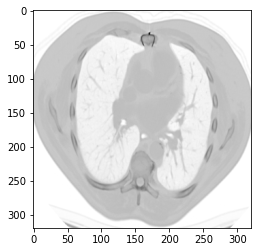

In [26]:
# Preview de una imagen de prueba
plt.imshow(train_images[600], cmap='gray')

In [28]:
# Dividir el dataset en 80% para entrenamiento y 20% para validación, o 70% - 30%.
# ¡Invesigar!

train_images = np.array(train_images)
train_labels = np.array(train_labels)

test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [29]:
# Normalización de valores de pixeles.
train_images = train_images / 255.0
test_images = test_images / 255.0

In [31]:
train_images = train_images.reshape(601, 320, 320,1)
test_images = test_images.reshape(315, 320, 320,1)

In [32]:
train_images.shape

(601, 320, 320, 1)

In [33]:
test_images.shape

(315, 320, 320, 1)

In [35]:
# Parte convolucional de la RNAC
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(320,320,1))) #1 canal = Grayscale?
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [36]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 318, 318, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 159, 159, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 157, 157, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 78, 78, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 76, 76, 64)        36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [37]:
# Parte de clasificación
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation = 'softmax'))

In [39]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 318, 318, 32)      320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 159, 159, 32)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 157, 157, 64)      18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 78, 78, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 76, 76, 64)        36928     
_________________________________________________________________
flatten (Flatten)            (None, 369664)            0         
_________________________________________________________________
dense (Dense)                (None, 64)               

In [40]:
# Compliación del modelo: características
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
# Entrenamiento de la RNAC
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Epoch 1/10
19/19 [==============================] - 40s 2s/step - loss: 2.1779 - accuracy: 0.4276 - val_loss: 1.0442 - val_accuracy: 0.4857
Epoch 2/10
19/19 [==============================] - 38s 2s/step - loss: 0.9248 - accuracy: 0.5591 - val_loss: 0.8929 - val_accuracy: 0.5302
Epoch 3/10
19/19 [==============================] - 39s 2s/step - loss: 0.7317 - accuracy: 0.6323 - val_loss: 0.9200 - val_accuracy: 0.4667
Epoch 4/10
19/19 [==============================] - 38s 2s/step - loss: 0.6159 - accuracy: 0.7205 - val_loss: 1.1454 - val_accuracy: 0.4762
Epoch 5/10
19/19 [==============================] - 38s 2s/step - loss: 0.5652 - accuracy: 0.7621 - val_loss: 1.0953 - val_accuracy: 0.5111
Epoch 6/10
19/19 [==============================] - 39s 2s/step - loss: 0.3641 - accuracy: 0.8652 - val_loss: 1.4936 - val_accuracy: 0.4794
Epoch 7/10
19/19 [==============================] - 39s 2s/step - loss: 0.2655 - accuracy: 0.9218 - val_loss: 2.4146 - val_accuracy: 0.4413
Epoch 8/10
19/19 [==

10/10 - 4s - loss: 1.7712 - accuracy: 0.5175


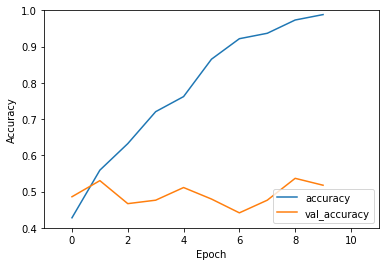

In [43]:
#Gráfica con la diferencia de valores de exactitud del entrenamiento y la validación. 

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.4, 1])
plt.xlim([-1, 11])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

In [44]:
print(test_acc)

0.5174603462219238


In [46]:
Testing = []

In [47]:
def test_function(file):
    test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )
    img_resized = cv2.resize(test_image, (320,320), )
    img_resized = cv2.bitwise_not(img_resized)
    img_resized = img_resized / 255.0
    img_resized = img_resized.reshape(1,320,320,1)
    ypred = model.predict(img_resized)
    print(np.argmax(ypred,-1))

In [49]:
#Category 0 - t1
file = '../input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000110 (6).png'
test_function(file)

[3]


In [50]:
#Category 0 - t2
file = "../input/chest-ctscan-images/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000111 (2).png"
test_function(file)

[0]


In [51]:
#Category 0 - t3
file = "../input/chest-ctscan-images/Data/valid/adenocarcinoma_left.lower.lobe_T2_N0_M0_Ib/000116 (9).png"
test_function(file)

[1]


In [52]:
#Category 1 -t4
file = "../input/chest-ctscan-images/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000111 (2).png"
test_function(file)

[1]


In [53]:
#Category 1 -t5
file = "../input/chest-ctscan-images/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000130.png"
test_function(file)

[0]


In [54]:
#Category 1 -t6
file = "../input/chest-ctscan-images/Data/valid/large.cell.carcinoma_left.hilum_T2_N2_M0_IIIa/000122.png"
test_function(file)

[1]


In [55]:
#Category 2 - t7
file = "../input/chest-ctscan-images/Data/valid/normal/004007_01_01_519.png"
test_function(file)

[3]


In [56]:
#Category 2 - t8
file = "../input/chest-ctscan-images/Data/valid/normal/6 - Copy.png"
test_function(file)

[2]


In [57]:
#Category 3 - t9
file = "../input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000119 (5).png"
test_function(file)

[0]


In [58]:
#Category 3 - t10
file = "../input/chest-ctscan-images/Data/valid/squamous.cell.carcinoma_left.hilum_T1_N2_M0_IIIa/000114 (6).png"
test_function(file)

[0]
